In [53]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import fmin_bfgs

%matplotlib inline

In [2]:
#loc = 'https://raw.githubusercontent.com/chenyuw1/coursera-ml-hw/master/hw2/ex2data2.txt'
loc = r'C:\Users\c0w00f8.WMSC\Documents\Coursera\1. Machine Learning\machine-learning-ex2\ex2\ex2data2.txt'
data = pd.read_csv(loc, sep = ',', header = None)
data.shape

(118, 3)

In [4]:
data.columns = ['Test1', 'Test2', 'y']
data.head()

,Test1,Test2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


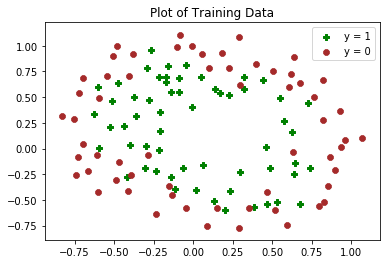

In [16]:
# visualizing the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
title = ax.set_title('Plot of Training Data')
plot1 = ax.scatter(data[data.y == 1].Test1, data[data.y == 1].Test2, marker = 'P', c = 'green',
                  label = 'y = 1')
plot2 = ax.scatter(data[data.y == 0].Test1, data[data.y == 0].Test2, marker = '8', c = 'brown',
                  label = 'y = 0')
ax.legend()
fig.canvas.draw()

In [185]:
# Feature mapping
def mapFeature(x1, x2, degree): 
    df0 = pd.DataFrame({'x1': x1, 'x2': x2})
    
    #else: 
    #    df0 = pd.concat([x1, x2], axis = 1)
    df = pd.DataFrame()
    for deg in range(degree + 1):
        for i in range(deg + 1):
                #print ("deg: ", deg)
                #print ("i: ", i)
            col1 = x1 ** i  
            col2 = x2 ** (deg - i)
            col = [ col1[j] * col2[j] for j in range(len(df0)) ]
            col = pd.DataFrame(col)                
            df = pd.concat([df, col], axis = 1)
                
            #print (df.shape)
    return df

In [186]:
data_mapped = mapFeature(data.iloc[:, 0], data.iloc[:, 1], 6)
data_mapped.shape

(118, 28)

In [48]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# sigmoid for vector/matrix
sigmd = np.vectorize(sigmoid)

In [83]:
# cost func
def costRegOpt(theta, x, y, l):
    m = len(y)    
    hx = sigmd(np.dot(x, theta))
    
    if (hx.all() != 0) and ((1 - hx).all() != 0):
        
        theta_2 = [ theta[i] ** 2 for i in range(len(theta)) ]
        j = (-y.T * np.log(hx) - (1 - y.T) * np.log(1 - hx)).sum() / m + sum(theta_2) * l / 2 / m
        
    else: j = 1000000
        
    return j

In [74]:
def gradReg(theta, x, y, l):
    m = len(y)
    hx = sigmd(np.dot(x, theta))
    
    grad = np.dot((hx - y), x) / m + l * theta / m
    grad[0] = ((hx[0] - y[0]) * x.iloc[:, 0]).sum() / m
    
    return grad

In [94]:
def init_theta(x):
    n = x.shape[1]
    return [0] * n

In [55]:
# prepare data
x = data_mapped
y = data.iloc[:, -1]

In [96]:
# cost function test
theta = init_theta(x)
costRegOpt(theta, x, y, 1)

0.6931471805599454

In [208]:
# optimize using fmin_bfgs
theta = init_theta(x)
l = 1
myargs = (x, y, l)
theta_opt = fmin_bfgs(costRegOpt, theta, args = myargs)
theta_opt

Optimization terminated successfully.
         Current function value: 0.535160
         Iterations: 46
         Function evaluations: 1410
         Gradient evaluations: 47


array([ 1.14216824,  1.16719601,  0.60159665, -1.27009818, -0.91585624,
       -1.8713386 , -0.17359497, -0.34493737, -0.36845894,  0.12635793,
       -1.16298585, -0.26932595, -0.60654142, -0.04896992, -1.42386124,
       -0.46905368, -0.2867609 , -0.28027311, -0.04338837, -0.20689057,
       -0.24354142, -0.93193376, -0.1379881 , -0.32900554,  0.01716398,
       -0.29266128,  0.02900087, -1.0365075 ])

In [209]:
# plot prep
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros(shape=(len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        ui = np.array([u[i]])
        vj = np.array([v[j]])
        z_i_j = mapFeature(ui, vj, 6)
        z[i, j] = z_i_j.dot(theta_opt)

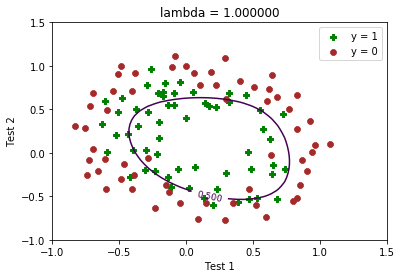

In [217]:
# plot

# visualizing the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
title = ax.set_title('lambda = %f' % l)
xlabel = ax.set_xlabel('Test 1')
ylabel = ax.set_ylabel('Test 2')
plot1 = ax.scatter(data[data.y == 1].Test1, data[data.y == 1].Test2, marker = 'P', c = 'green',
                  label = 'y = 1')
plot2 = ax.scatter(data[data.y == 0].Test1, data[data.y == 0].Test2, marker = '8', c = 'brown',
                  label = 'y = 0')

z = z.T
plot3 = ax.contour(u, v, z, levels = [0.5])
plot3.clabel(inline = True, fontsize = 9)

ax.legend()
fig.canvas.draw()

In [218]:
# test lambda = 0
theta = init_theta(x)
l = 0
myargs = (x, y, l)
theta_opt = fmin_bfgs(costRegOpt, theta, args = myargs)
theta_opt

Optimization terminated successfully.
         Current function value: 0.224570
         Iterations: 592
         Function evaluations: 18090
         Gradient evaluations: 603


array([   35.09227487,    69.27322069,    44.09635521,  -184.1547381 ,
        -198.22055163,  -344.18466304,  -328.40460674,  -510.80993322,
        -621.5853559 ,  -295.64946664,   436.48462855,   900.83679859,
        1757.19464755,  1269.42968089,  1094.3976592 ,   464.08796873,
        1131.37426484,  1929.69940711,  1822.30597407,  1235.68892903,
         470.83523509,  -510.57505832, -1546.26280216, -3251.99077104,
       -3484.08097335, -3462.14114239, -2020.40640901, -1141.78779799])

In [219]:
# plot prep
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros(shape=(len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        ui = np.array([u[i]])
        vj = np.array([v[j]])
        z_i_j = mapFeature(ui, vj, 6)
        z[i, j] = z_i_j.dot(theta_opt)

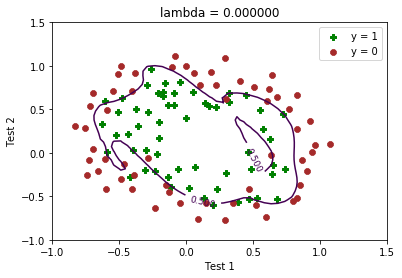

In [220]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
title = ax.set_title('lambda = %f' % l)
xlabel = ax.set_xlabel('Test 1')
ylabel = ax.set_ylabel('Test 2')
plot1 = ax.scatter(data[data.y == 1].Test1, data[data.y == 1].Test2, marker = 'P', c = 'green',
                  label = 'y = 1')
plot2 = ax.scatter(data[data.y == 0].Test1, data[data.y == 0].Test2, marker = '8', c = 'brown',
                  label = 'y = 0')

z = z.T
plot3 = ax.contour(u, v, z, levels = [0.5])
plot3.clabel(inline = True, fontsize = 9)

ax.legend()
fig.canvas.draw()

In [221]:
# test lambda = 100
theta = init_theta(x)
l = 100
myargs = (x, y, l)
theta_opt = fmin_bfgs(costRegOpt, theta, args = myargs)
theta_opt

Optimization terminated successfully.
         Current function value: 0.686527
         Iterations: 4
         Function evaluations: 150
         Gradient evaluations: 5


array([ 0.00468518,  0.0064181 , -0.0172703 , -0.03727036, -0.01327387,
       -0.05402538, -0.02224655, -0.00885247, -0.00760979, -0.0182134 ,
       -0.04072361, -0.00354777, -0.01393125, -0.0023857 , -0.04288319,
       -0.03153266, -0.0050035 , -0.00624861, -0.00354972, -0.00467175,
       -0.02078684, -0.04058929, -0.00157661, -0.00788562, -0.00039446,
       -0.00694158, -0.00108325, -0.03381526])

In [222]:
# plot prep
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros(shape=(len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        ui = np.array([u[i]])
        vj = np.array([v[j]])
        z_i_j = mapFeature(ui, vj, 6)
        z[i, j] = z_i_j.dot(theta_opt)

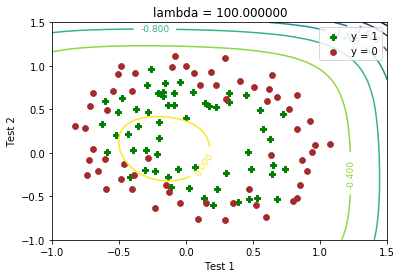

In [225]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
title = ax.set_title('lambda = %f' % l)
xlabel = ax.set_xlabel('Test 1')
ylabel = ax.set_ylabel('Test 2')
plot1 = ax.scatter(data[data.y == 1].Test1, data[data.y == 1].Test2, marker = 'P', c = 'green',
                  label = 'y = 1')
plot2 = ax.scatter(data[data.y == 0].Test1, data[data.y == 0].Test2, marker = '8', c = 'brown',
                  label = 'y = 0')

z = z.T
plot3 = ax.contour(u, v, z)
plot3.clabel(inline = True, fontsize = 9)

ax.legend()
fig.canvas.draw()